<a href="https://colab.research.google.com/github/avi-0106/statistical_toolkit/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TUTORIAL

### Welcome to the tutorial for statistical_tests

In this tutorial, we will use two well-known datasets - iris and titanic to demonstrate how to use the statistical_tests package

In [1]:
! pip install statistical_tests==0.1

### 1. Import ZTest, TTest, ANOVA and ChiSqaureTest from the package

We will use these functions to generate test results and plots

In [2]:
from statistical_tests import ZTest, TTest, ANOVA, ChiSquareTest

### 2. Import pandas and load datasets

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

# Load real-world datasets
# Iris dataset for parametric tests
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target  # 0=setosa, 1=versicolor, 2=virginica

# Titanic dataset for chi-square test (verified working URL)
titanic_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(titanic_url)

# Load real-world datasets
# Iris dataset for parametric tests
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target  # 0=setosa, 1=versicolor, 2=virginica

# Titanic dataset for chi-square test (verified working URL)
titanic_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(titanic_url)

### 3. Dataset preview

In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4.1. Z-Test

Here, we use the iris dataset to demonstrate z-test.  

The Z-test is used when the population standard deviation is known, and we want to determine whether a sample mean significantly differs from a hypothesized population mean. 

We use a one-sample Z-test to analyze whether the mean sepal length of the Setosa species in the iris dataset is significantly different from a hypothetical population mean of 5 cm. We assume a known population standard deviation of 0.5 cm and conduct a two-tailed test at a 5% significance level.

We can simply pass the sepal length of setosa species as the data1 parameter and plug in the parameters based on the problem.

In [10]:
# One-sample Z-test (two-tailed)
setosa_sepal = iris_df[iris_df['species'] == 0]['sepal length (cm)'].values
z_one_sample = ZTest(
    data1=setosa_sepal,
    population_mean=5.0,  # Hypothetical population mean
    sigma1=0.5,           # Known population std
    tail="two",
    alpha=0.05
)

print(z_one_sample.run_test())

{'z_statistic': np.float64(0.08485281374238891), 'p_value': np.float64(0.932378405606689), 'alpha': 0.05}


Visualize the test results using plot_test(), which shows the standard normal distribution, rejection regions, and computed Z-statistic.

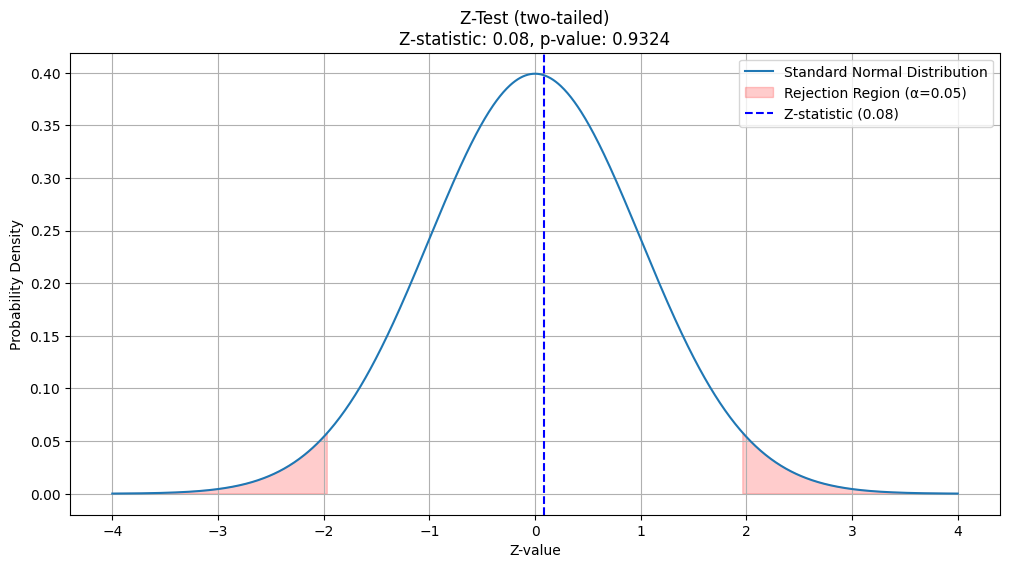

In [11]:
z_one_sample.plot_test()

Here we can clearly see that the Z-statistic does not fall in the rejection region, and so we cannot reject the null-hypothesis. Based on this we can conclude that there is no statistically significant difference between the sample mean and the hypothesized population mean of 5 cm.

However, if we test for the hypothesized population mean of 5.2 cm, we get different results, as shown below:

{'z_statistic': np.float64(-2.743574311003804), 'p_value': np.float64(0.006077429111267518), 'alpha': 0.05}


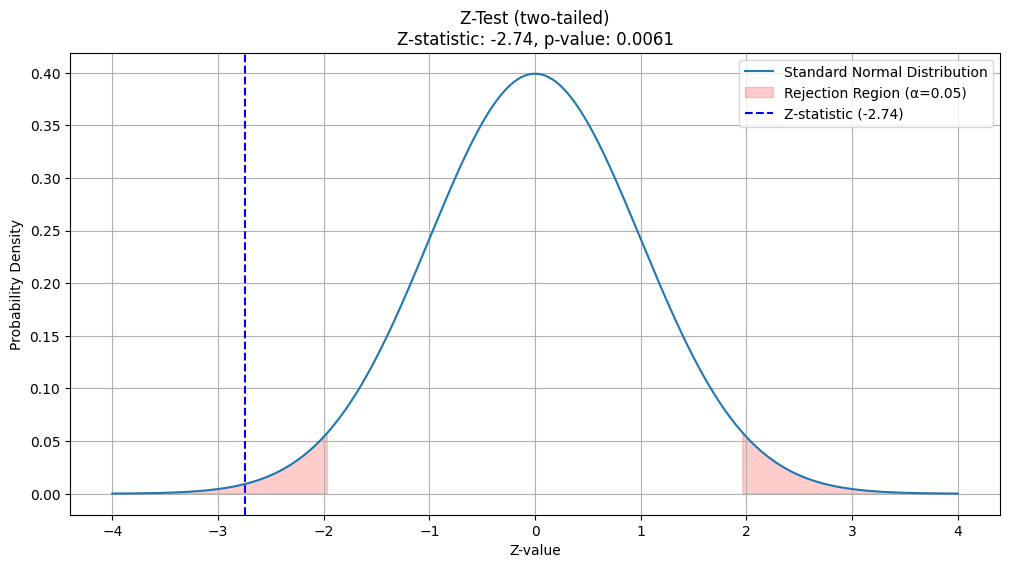

In [19]:
# One-sample Z-test (two-tailed)
setosa_sepal = iris_df[iris_df['species'] == 0]['sepal length (cm)'].values
z_one_sample = ZTest(
    data1=setosa_sepal,
    population_mean=5.2,  # New hypothetical population mean
    sigma1=0.5,           # Known population std
    tail="two",
    alpha=0.05
)

print(z_one_sample.run_test())
z_one_sample.plot_test()

Here, the Z-statistic falls in the rejection region and thus, we can conclude that the hypothesized population mean (5.2cm) is significantly different from the sample mean.

### 4.2. T-test

This two-sample T-test examines whether there is a significant difference in the average ages of male and female passengers in the Titanic dataset. By comparing the two independent samples with a two-tailed test at a 5% significance level, we assess whether the observed difference is statistically meaningful or due to random variation.

{'t_statistic': np.float64(2.5258975171938896), 'p_value': np.float64(0.011814913211889736), 'dof': np.float64(560.0505568947058), 'alpha': 0.05}


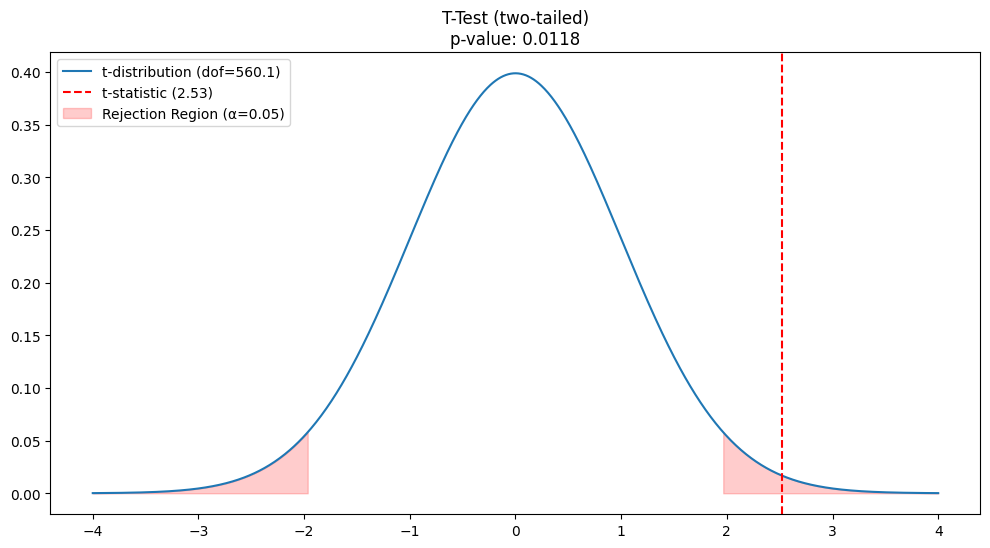

In [21]:
# Two-sample T-test (two-tailed)
male_ages = titanic_df[titanic_df['Sex'] == 'male']['Age'].dropna().values
female_ages = titanic_df[titanic_df['Sex'] == 'female']['Age'].dropna().values
two_sample_ttest = TTest(
    data1=male_ages,
    data2=female_ages,
    tail="two",
    alpha=0.05
)
print(two_sample_ttest.run_test())

two_sample_ttest.plot_test()

Since the t-statistic lies in the rejection region, we reject the null hypothesis. This suggests a statistically significant difference in the average ages of male and female passengers on the Titanic.

### 4.3. ANOVA

We use a one-way ANOVA test to determine whether there is a statistically significant difference in the mean sepal lengths among the three iris species. The test is conducted at a 5% significance level, comparing the variance between groups to the variance within groups.

{'f_stat': np.float64(119.26450218450468), 'p_value': np.float64(1.6696691907693826e-31), 'eta_squared': np.float64(0.6187057307384857), 'alpha': 0.05}


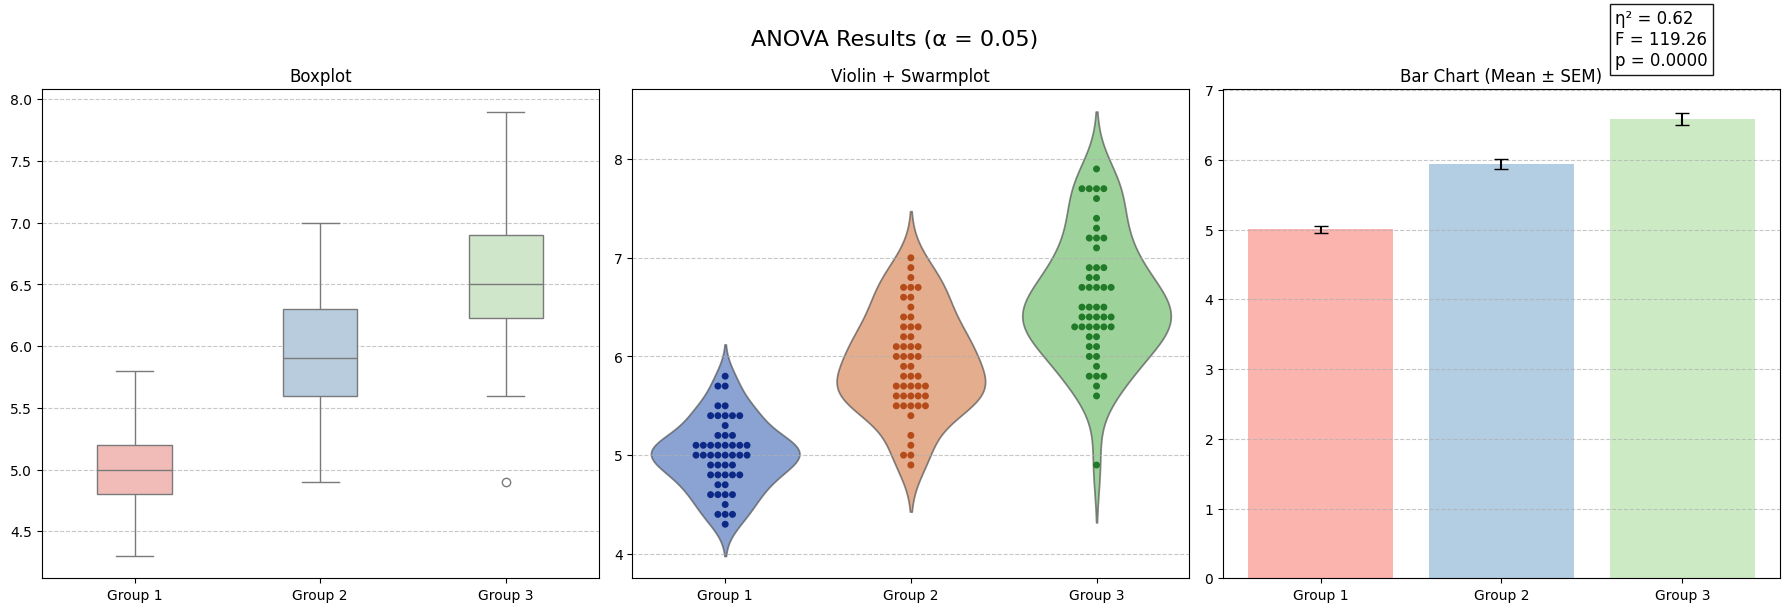

In [23]:
group1 = iris_df[iris_df['species'] == 0]['sepal length (cm)'].values
group2 = iris_df[iris_df['species'] == 1]['sepal length (cm)'].values
group3 = iris_df[iris_df['species'] == 2]['sepal length (cm)'].values

anova_test = ANOVA(group1, group2, group3, alpha=0.05)
print(anova_test.run_test())
anova_test.plot_test()

The F-statistic (119.26) is very large, and the p-value (~1.67e-31) is far below the 0.05 significance threshold, leading us to reject the null hypothesis. This suggests that at least one species has a significantly different mean sepal length compared to the others. The effect size, measured by eta squared (0.619), indicates that approximately 61.9% of the variance in sepal length is explained by species differences, showing a strong relationship between species and sepal length.

### 4.4. Chi-Square Test

The Chi-Square test is used to determine whether there is a significant association between survival and gender among Titanic passengers. 

The ```ChiSquareTest``` function requires a [contingency table](https://www.graphpad.com/guides/prism/latest/user-guide/contingency_table.htm). We create this by cross-tabulating the number of survivors and non-survivors for each gender. This table provides the observed frequencies for each class.

The Chi-Square test then compares these observed values to expected frequencies under the assumption that survival is independent of gender.

{'chi2': np.float64(260.71702016732104), 'p_value': np.float64(1.197357062775565e-58), 'dof': 1, 'expected': array([[193.47474747, 355.52525253],
       [120.52525253, 221.47474747]]), 'phi': np.float64(0.5409359434469282), 'cramers_v': np.float64(0.5409359434469282)}


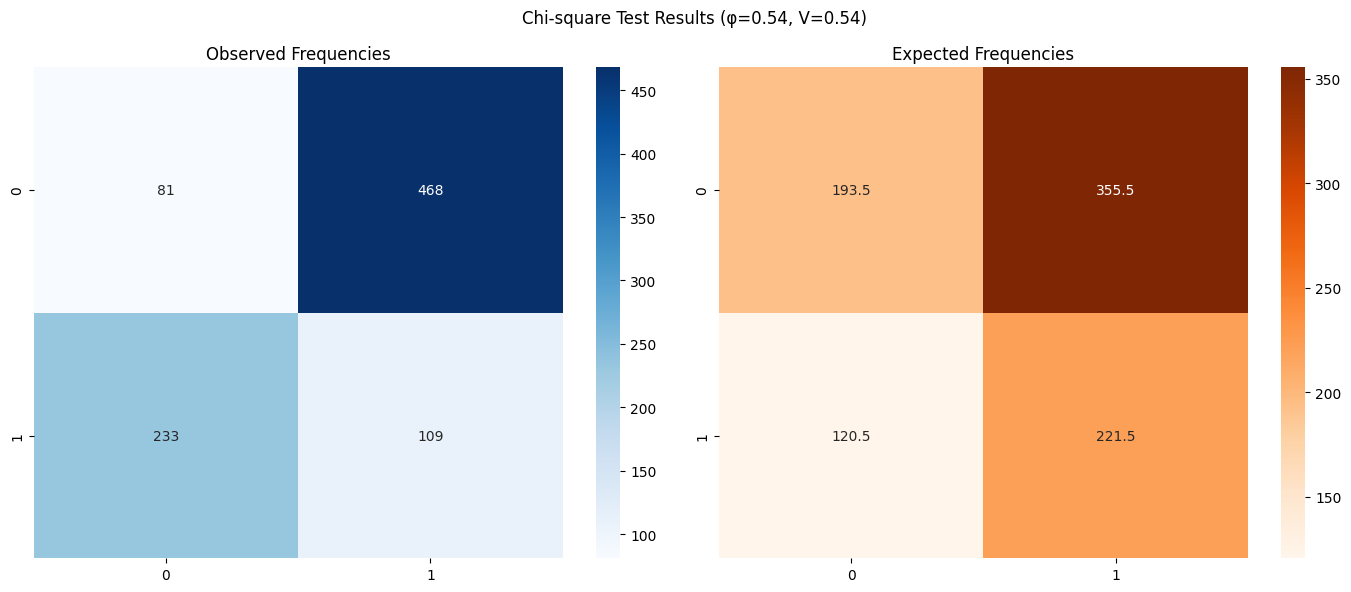

In [24]:
contingency_table = pd.crosstab(
    titanic_df['Survived'],
    titanic_df['Sex'],
    rownames=['Survived'],
    colnames=['Sex']
).values

chi_test = ChiSquareTest(contingency_table)
print(chi_test.run_test())
chi_test.plot_test()

The chi-square statistic (260.72) is extremely large, and the p-value (~1.2e-58) is far below the 0.05 significance level, leading us to reject the null hypothesis. This means that survival was not independent of gender. The effect size, measured by both Phi and Cramér’s V (0.54), suggests a strong relationship between the two variables. Women had a significantly higher survival rate compared to men, confirming historical accounts of the “women and children first” policy.